In [34]:
# import dependencies
from sklearn.preprocessing import LabelEncoder
from sqlalchemy import create_engine
from config import dbConnectionString
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import numpy as np
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint

In [35]:
engine = create_engine(dbConnectionString)

#import dataframe from SQL database
df = pd.read_sql_query('select * from "cardioData"',con=engine)
df = df.drop(columns = ['index', 'id'])
df

,age,gender,height,weight,cardiovascular,BMI,ap_hi,ap_lo,cholestrol,gloucose,smoke,alchohol,active
0,50.4,Female,168.0,62.0,False,23,110,80,normal,normal,False,False,True
1,55.4,Male,156.0,85.0,True,46,140,90,well above normal,normal,False,False,True
2,51.7,Male,165.0,64.0,True,25,130,70,well above normal,normal,False,False,False
3,47.9,Male,156.0,56.0,False,20,100,60,normal,normal,False,False,False
4,60.0,Male,151.0,67.0,False,30,120,80,above normal,above normal,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63911,52.7,Female,168.0,76.0,False,34,120,80,normal,normal,True,False,True
63912,61.9,Male,158.0,126.0,True,100,140,90,above normal,above normal,False,False,True
63913,52.2,Female,183.0,105.0,True,60,180,90,well above normal,normal,False,True,False
63914,61.5,Male,163.0,72.0,True,32,135,80,normal,well above normal,False,False,False


In [36]:
le = LabelEncoder()
df2 = df.copy()
df2

,age,gender,height,weight,cardiovascular,BMI,ap_hi,ap_lo,cholestrol,gloucose,smoke,alchohol,active
0,50.4,Female,168.0,62.0,False,23,110,80,normal,normal,False,False,True
1,55.4,Male,156.0,85.0,True,46,140,90,well above normal,normal,False,False,True
2,51.7,Male,165.0,64.0,True,25,130,70,well above normal,normal,False,False,False
3,47.9,Male,156.0,56.0,False,20,100,60,normal,normal,False,False,False
4,60.0,Male,151.0,67.0,False,30,120,80,above normal,above normal,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63911,52.7,Female,168.0,76.0,False,34,120,80,normal,normal,True,False,True
63912,61.9,Male,158.0,126.0,True,100,140,90,above normal,above normal,False,False,True
63913,52.2,Female,183.0,105.0,True,60,180,90,well above normal,normal,False,True,False
63914,61.5,Male,163.0,72.0,True,32,135,80,normal,well above normal,False,False,False


In [37]:
#female = 0, male = 1
df2['gender'] = le.fit_transform(df2['gender'])
df2

,age,gender,height,weight,cardiovascular,BMI,ap_hi,ap_lo,cholestrol,gloucose,smoke,alchohol,active
0,50.4,0,168.0,62.0,False,23,110,80,normal,normal,False,False,True
1,55.4,1,156.0,85.0,True,46,140,90,well above normal,normal,False,False,True
2,51.7,1,165.0,64.0,True,25,130,70,well above normal,normal,False,False,False
3,47.9,1,156.0,56.0,False,20,100,60,normal,normal,False,False,False
4,60.0,1,151.0,67.0,False,30,120,80,above normal,above normal,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63911,52.7,0,168.0,76.0,False,34,120,80,normal,normal,True,False,True
63912,61.9,1,158.0,126.0,True,100,140,90,above normal,above normal,False,False,True
63913,52.2,0,183.0,105.0,True,60,180,90,well above normal,normal,False,True,False
63914,61.5,1,163.0,72.0,True,32,135,80,normal,well above normal,False,False,False


In [38]:
normal_dic = {
    "normal" : 0,
    "above normal" : 1,
    "well above normal" : 2,
}

true_false_dic = {
    True : 1,
    False : 0,
}

df2['cardiovascular'] = df2['cardiovascular'].apply(lambda x : true_false_dic[x])
df2['smoke'] = df2['smoke'].apply(lambda x : true_false_dic[x])
df2['alchohol'] = df2['alchohol'].apply(lambda x : true_false_dic[x])
df2['active'] = df2['active'].apply(lambda x : true_false_dic[x])

df2['cholestrol'] = df2['cholestrol'].apply(lambda x : normal_dic[x])
df2['gloucose'] = df2['gloucose'].apply(lambda x : normal_dic[x])
df2

,age,gender,height,weight,cardiovascular,BMI,ap_hi,ap_lo,cholestrol,gloucose,smoke,alchohol,active
0,50.4,0,168.0,62.0,0,23,110,80,0,0,0,0,1
1,55.4,1,156.0,85.0,1,46,140,90,2,0,0,0,1
2,51.7,1,165.0,64.0,1,25,130,70,2,0,0,0,0
3,47.9,1,156.0,56.0,0,20,100,60,0,0,0,0,0
4,60.0,1,151.0,67.0,0,30,120,80,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63911,52.7,0,168.0,76.0,0,34,120,80,0,0,1,0,1
63912,61.9,1,158.0,126.0,1,100,140,90,1,1,0,0,1
63913,52.2,0,183.0,105.0,1,60,180,90,2,0,0,1,0
63914,61.5,1,163.0,72.0,1,32,135,80,0,2,0,0,0


In [39]:
# set X and y values
X = df2.drop(['cardiovascular', 'BMI'], 1).values
y = df2['cardiovascular'].values

C:\Users\Fadl\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [40]:
# split data into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=84, stratify=y)

scaler= StandardScaler()

X_scaler = scaler.fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [41]:
# neural net
input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 13
hidden_nodes_layer2 = 7
hidden_nodes_layer3 = 3
nn_model = tf.keras.models.Sequential()

# first layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=input_features, activation="ReLU"))

# second layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# third layer
nn_model.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="sigmoid"))

# output layer
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# check the structure
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 13)                156       
_________________________________________________________________
dense_13 (Dense)             (None, 7)                 98        
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 24        
_________________________________________________________________
dense_15 (Dense)             (None, 1)                 4         
Total params: 282
Trainable params: 282
Non-trainable params: 0
_________________________________________________________________


In [42]:
# compile model
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

cp_callback = ModelCheckpoint(
    filepath= 'checkpoints/weights.{epoch:02d}.hdf5',
    verbose=1,
    save_weights_only=True,
    save_freq=4020)

# Train the model
fit_model = nn_model.fit(X_train_scaled,y_train,epochs=56, callbacks = [cp_callback])

Epoch 1/56
1499/1499 [==============================] - 1s 516us/step - loss: 0.5957 - accuracy: 0.7056
Epoch 2/56
1499/1499 [==============================] - 1s 497us/step - loss: 0.5606 - accuracy: 0.7238
Epoch 3/56
 937/1499 [=================>............] - ETA: 0s - loss: 0.5568 - accuracy: 0.7249
Epoch 00003: saving model to checkpoints\weights.03.hdf5
1499/1499 [==============================] - 1s 504us/step - loss: 0.5564 - accuracy: 0.7250
Epoch 4/56
1499/1499 [==============================] - 1s 507us/step - loss: 0.5547 - accuracy: 0.7254
Epoch 5/56
1499/1499 [==============================] - 1s 495us/step - loss: 0.5536 - accuracy: 0.7258
Epoch 6/56
 505/1499 [=========>....................] - ETA: 0s - loss: 0.5544 - accuracy: 0.7235
Epoch 00006: saving model to checkpoints\weights.06.hdf5
1499/1499 [==============================] - 1s 526us/step - loss: 0.5530 - accuracy: 0.7261
Epoch 7/56
1499/1499 [==============================] - 1s 496us/step - loss: 0.5524 - a

1499/1499 [==============================] - 1s 512us/step - loss: 0.5485 - accuracy: 0.7273
Epoch 54/56
 852/1499 [================>.............] - ETA: 0s - loss: 0.5482 - accuracy: 0.7288
Epoch 00054: saving model to checkpoints\weights.54.hdf5
1499/1499 [==============================] - 1s 530us/step - loss: 0.5484 - accuracy: 0.7281
Epoch 55/56
1499/1499 [==============================] - 1s 503us/step - loss: 0.5482 - accuracy: 0.7276
Epoch 56/56
1499/1499 [==============================] - 1s 509us/step - loss: 0.5483 - accuracy: 0.7282


In [43]:
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

500/500 - 0s - loss: 0.5519 - accuracy: 0.7231
Loss: 0.551872193813324, Accuracy: 0.7231366038322449


In [45]:
nn_model.save('cardio_model.h5')
nn_model.save_weights('nn_model/nn_model.h5')
model_json = nn_model.to_json()
with open("nn_model/nn_model.json", "w") as json_file:
    json_file.write(model_json)
    
# Save scalar info
means = scaler.mean_
vars = scaler.var_
np.save('nn_model/scaler_means', means)
np.save('nn_model/scalar_var', means)

<AxesSubplot:>

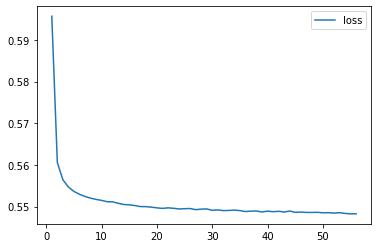

In [46]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history)

# Increase the index by 1 to match the number of epochs
history_df.index += 1

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

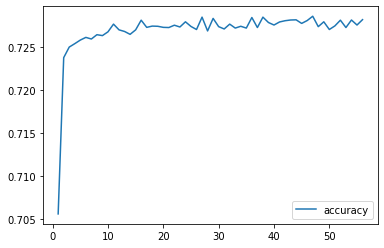

In [47]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [48]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf7"